# Table of Contents
 <p><div class="lev1 toc-item"><a href="#Malus-with-two-polarizers" data-toc-modified-id="Malus-with-two-polarizers-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Malus with two polarizers</a></div><div class="lev3 toc-item"><a href="#Motors-definition" data-toc-modified-id="Motors-definition-101"><span class="toc-item-num">1.0.1&nbsp;&nbsp;</span>Motors definition</a></div><div class="lev3 toc-item"><a href="#Labjack-definition" data-toc-modified-id="Labjack-definition-102"><span class="toc-item-num">1.0.2&nbsp;&nbsp;</span>Labjack definition</a></div><div class="lev2 toc-item"><a href="#Experiments" data-toc-modified-id="Experiments-11"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Experiments</a></div><div class="lev3 toc-item"><a href="#Intensity-with-no-polarizers" data-toc-modified-id="Intensity-with-no-polarizers-111"><span class="toc-item-num">1.1.1&nbsp;&nbsp;</span>Intensity with no polarizers</a></div><div class="lev2 toc-item"><a href="#Intensity-with-one-polarizer" data-toc-modified-id="Intensity-with-one-polarizer-12"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Intensity with one polarizer</a></div><div class="lev3 toc-item"><a href="#Malus-Law" data-toc-modified-id="Malus-Law-121"><span class="toc-item-num">1.2.1&nbsp;&nbsp;</span>Malus Law</a></div><div class="lev2 toc-item"><a href="#Final:-Close" data-toc-modified-id="Final:-Close-13"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Final: Close</a></div>

# Malus with two polarizers

Author: Luis Miguel Sanchez Brea

Date:   19/02/2018

Purpose: Ecograb project, polariscope callibration

We have diode laser at 850 nm (current = 329 mA, 2.44 V)
We have lens for collimating and Thorlabs DG10-600-B diffuser

We have polarizer 1 Thorlabs LPNIRE100-B
We have polarizer 4 Thorlabs LPNIRE100-B

Polarizer 1 is placed at 0º, arbitrarily
Polarizer 4 is placed at 0º

We rotate Polarizer 4 (motor 4) in order to determine the polarization parameters of LPNIRE100-B. We assume that polarizers do not present depolarization and then, Jones Matrix formalism is valid:

**objective** 
In this notebook we only determine the experimental intensity distribution for post-analysis

In [1]:
%load_ext autoreload
%autoreload 2

%matplotlib inline

In [16]:
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
import hickle as hkl
import time
import pprint
from __future__ import print_function

### Motors definition

In [3]:
from polarimeter.motors.rotary_motors import Motors
Comports = [3, 4, 5, 7] 
Vels = [600, 600, 600, 600]

70.306


In [4]:
motors = Motors(RS232_COMPORT=Comports, init_vels=Vels) 

Connected to (c)2013 Physik Instrumente(PI) Karlsruhe, C-663.11,0,1.2.1.0

Connected to (c)2013 Physik Instrumente(PI) Karlsruhe, C-663.11,0,1.2.1.0

Connected to (c)2013 Physik Instrumente(PI) Karlsruhe, C-663.11,0,1.2.1.0

Connected to (c)2013 Physik Instrumente(PI) Karlsruhe, C-663.11,0,1.2.1.0



### Labjack definition

In [5]:
import u3
import LabJackPython

V=1.
mV=V/1000

def to_bits(variable_integer, num_bits=16, verbose=True):
    """
    takes an integer an generates a list with bits

    Args:
        variable_integer (int): integer with data
        num_bits (int): num of output bits: 8,16, 32, 64
    """
    if num_bits == 8:
        output = map(int, [x for x in '{:08b}'.format(variable_integer)])
    elif num_bits == 16:
        output = map(int, [x for x in '{:016b}'.format(variable_integer)])
    elif num_bits == 32:
        output = map(int, [x for x in '{:032b}'.format(variable_integer)])
    elif num_bits == 64:
        output = map(int, [x for x in '{:064b}'.format(variable_integer)])

    if verbose is True:
        print( output)
    return output

In [6]:
# loads labjack
d=u3.U3()

In [7]:
print("\n Callibration data:")
data_callibration=d.getCalibrationData()
pprint.pprint(data_callibration)


 Callibration data:
{'dac0Offset': -0.6872114308644086,
 'dac0Slope': 50.9896679460071,
 'dac1Offset': -0.701979405945167,
 'dac1Slope': 50.91950369440019,
 'hvAIN0Offset': -10.518997645704076,
 'hvAIN0Slope': 0.00031980290077626705,
 'hvAIN1Offset': -10.489001986570656,
 'hvAIN1Slope': 0.0003192389849573374,
 'hvAIN2Offset': -10.523998295888305,
 'hvAIN2Slope': 0.0003195337485522032,
 'hvAIN3Offset': -10.51609767600894,
 'hvAIN3Slope': 0.00031975959427654743,
 'lvDiffOffset': -2.490987469209358,
 'lvDiffSlope': 7.56862573325634e-05,
 'lvSEOffset': 0.001728925621137023,
 'lvSESlope': 3.775535151362419e-05,
 'tempSlope': 0.01259785215370357,
 'vRef1.5AtCal': 0.0,
 'vRefAtCAl': 2.486867640633136,
 'vRegAtCal': 0.0}


In [8]:
AIN_number=1
ain1bits, = d.getFeedback(u3.AIN(AIN_number)) # Read from raw bits from AIN0
ainValue = d.binaryToCalibratedAnalogVoltage(ain1bits, isLowVoltage = False, channelNumber = 0)
print(ainValue)


0.14451027778


In [9]:
def get_intensity(AIN_number=1, verbose=True):
    ain1bits, = d.getFeedback(u3.AIN(AIN_number)) # Read from raw bits from AIN0
    ainValue = d.binaryToCalibratedAnalogVoltage(ain1bits, isLowVoltage = False, channelNumber = 0)
    if verbose is True:
        print("{:2.5f}".format(ainValue), end=', ')
    return ainValue

## Experiments

### Intensity with no polarizers
We have diode laser at 850 nm (current = 329 mA, 2.44 V, 60 db) 1 sheet of paper
We measure several times with no movement. No polarizers are present

In [48]:
num_data=90
interval=0.01

times=sp.array(range(num_data))*interval
intensities_0=sp.zeros_like(times,dtype=float)

In [49]:
for i, t in enumerate(times):
    intensities_0[i]=get_intensity(verbose=True)
    time.sleep(interval)

3.50628, 3.50628, 3.50628, 3.51140, 3.50628, 3.51140, 3.50628, 3.51140, 3.50628, 3.50628, 3.51140, 3.51140, 3.50628, 3.50628, 3.51140, 3.51140, 3.51140, 3.50628, 3.50628, 3.51140, 3.51140, 3.51140, 3.51140, 3.50628, 3.51140, 3.50628, 3.51140, 3.51140, 3.50628, 3.51140, 3.51140, 3.50628, 3.50628, 3.51140, 3.50628, 3.50628, 3.50628, 3.50628, 3.51140, 3.50628, 3.51140, 3.50628, 3.50628, 3.50628, 3.51140, 3.51140, 3.50628, 3.50628, 3.51140, 3.50628, 3.51140, 3.50628, 3.50628, 3.51140, 3.51140, 3.50628, 3.50628, 3.51140, 3.51140, 3.50628, 3.51140, 3.50628, 3.50628, 3.50628, 3.50628, 3.51140, 3.51140, 3.51140, 3.51140, 3.51140, 3.50628, 3.50628, 3.50628, 3.51140, 3.50628, 3.51140, 3.50628, 3.51140, 3.50628, 3.50628, 3.51140, 3.51140, 3.50628, 3.51140, 3.51140, 3.51140, 3.51140, 3.51140, 3.51140, 3.51140, 

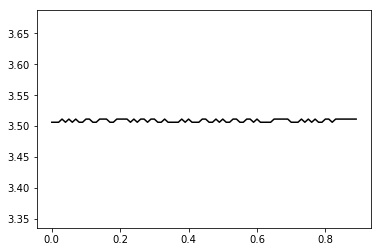

In [73]:
plt.figure()
plt.plot(times,intensities_0,'k')
plt.ylim(intensities_0.max()*0.95,intensities_0.max()*1.05)
plt.savefig('Intensities_0.pdf')

In [55]:
I0=sp.mean(intensities_0)
print("The mean intensity is {}".format(I0))

The mean intensity is 3.5088936478


In [56]:
np.save('I_malus_0_180219.npy', np.array([times,intensities_0]).transpose())
np.savetxt('I_malus_0_180219.txt', np.array([times,intensities_0]).transpose() )

## Intensity with one polarizer
We include first linear polarizer (motor 1) and move 360 degrees in order to analyze inhomogenties of light source

In [57]:
num_data=90
angles=sp.linspace(0,360,num_data)
intensities_1=sp.zeros_like(angles,dtype=float)

In [58]:
for i, angle in enumerate(angles):
    motors.move(
        positions=[angle, 0, 0, 0], velocities=Vels, verbose=False)
    intensities_1[i]=get_intensity(verbose=True)

1.71027, 1.71027, 1.71027, 1.71027, 1.70515, 1.70515, 1.70515, 1.70515, 1.70003, 1.70003, 1.69491, 1.70003, 1.69491, 1.70003, 1.69491, 1.69491, 1.68980, 1.69491, 1.69491, 1.68980, 1.68980, 1.69491, 1.68980, 1.69491, 1.69491, 1.70003, 1.70003, 1.70003, 1.70003, 1.70515, 1.70003, 1.70515, 1.71027, 1.71027, 1.71027, 1.71538, 1.71538, 1.71538, 1.71538, 1.71538, 1.71538, 1.71538, 1.71538, 1.71027, 1.71538, 1.71027, 1.71027, 1.71027, 1.70515, 1.70515, 1.70003, 1.70003, 1.70003, 1.70003, 1.70003, 1.69491, 1.69491, 1.69491, 1.68980, 1.69491, 1.69491, 1.68980, 1.69491, 1.68980, 1.69491, 1.68980, 1.69491, 1.69491, 1.69491, 1.69491, 1.69491, 1.70003, 1.70003, 1.70003, 1.70515, 1.71027, 1.70515, 1.71027, 1.71027, 1.71538, 1.71538, 1.71538, 1.71538, 1.72050, 1.71538, 1.71538, 1.71538, 1.71538, 1.71538, 1.71538, 

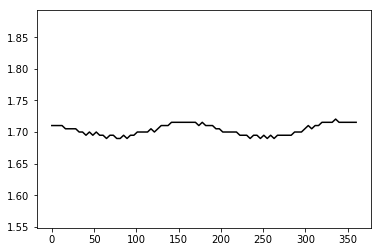

In [72]:
plt.figure()
plt.plot(angles,intensities_1,'k')
plt.ylim(intensities_1.max()*0.9,intensities_1.max()*1.1)
plt.savefig('Intensities_1.pdf')

In [61]:
np.save('I_malus_1_180219.npy', np.array([angles,intensities_1]).transpose())
np.savetxt('I_malus_1_180219.txt', np.array([angles,intensities_1]).transpose() )

### Malus Law
We include the 2nd polarizer (motor 4) and move motor 4 from 0 to 360º in order to determine $p_0$ and $p_1$ parameters of polarizers.
Motor 0 is placed at theta=0

In [62]:
motor_1_max=0

# Move motor 1 to maximum position of laser diode
Vels=[50,50,50,50]

motors.move(
        positions=[0, 0, 0, 0], velocities=Vels, verbose=False)
motors.get_position()
get_intensity(verbose=True)

current positions = ([ 0.], [ 0.], [ 0.], [ 0.])
0.20591, 

0.20591243472881615

In [63]:
num_data=90
angles=sp.linspace(0,360,num_data)
intensities_2=sp.zeros_like(angles,dtype=float)

In [65]:
for i, angle in enumerate(angles):
    motors.move(
        positions=[0, 0, 0, angle], velocities=Vels, verbose=False)
    intensities_2[i]=get_intensity(verbose=True)

0.20591, 0.26731, 0.33895, 0.42594, 0.51804, 0.60503, 0.70225, 0.79947, 0.89669, 0.97856, 1.07066, 1.14741, 1.21905, 1.28045, 1.32650, 1.36744, 1.39814, 1.40837, 1.40837, 1.39302, 1.36232, 1.32138, 1.27533, 1.20881, 1.13718, 1.05019, 0.96832, 0.87622, 0.78412, 0.68690, 0.59479, 0.50269, 0.41059, 0.32872, 0.25708, 0.19056, 0.13939, 0.10358, 0.06776, 0.05241, 0.05241, 0.05752, 0.08822, 0.12916, 0.17521, 0.23150, 0.30313, 0.38500, 0.46687, 0.55897, 0.65108, 0.74318, 0.84552, 0.93762, 1.02461, 1.11159, 1.18323, 1.25487, 1.30603, 1.34697, 1.38279, 1.40325, 1.40837, 1.39814, 1.37767, 1.34697, 1.29580, 1.24463, 1.17300, 1.09624, 1.01437, 0.92227, 0.83017, 0.73806, 0.64084, 0.54874, 0.45664, 0.37477, 0.29290, 0.22638, 0.16498, 0.12404, 0.08311, 0.05752, 0.05241, 0.05752, 0.07287, 0.10869, 0.14963, 0.20591, 

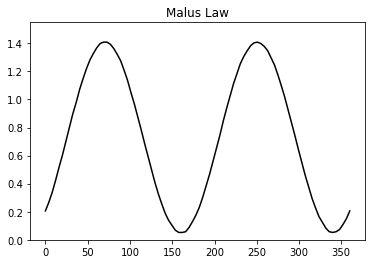

In [71]:
plt.figure()
plt.plot(angles, intensities_2,'k')
plt.title('Malus Law')
plt.ylim(0,intensities_2.max()*1.1)
plt.savefig('Intensities_2.pdf')

In [69]:
np.save('I_malus_2_180219.npy', np.array([angles, intensities_2]).transpose())
np.savetxt('I_malus_2_180219.txt',  np.array([angles, intensities_2]).transpose())

## Final: Close

In [74]:
motors.close()
del motors
LabJackPython.Close()